In [375]:
import pickle

In [376]:
with open("/Users/User/Desktop/Python/final_project/dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [377]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
source_df = pd.DataFrame.from_dict(data_dict, orient = 'index')
source_df.drop('TOTAL',inplace=True)

In [378]:
source_df

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,119292
CAUSEY RICHARD A,415189,1892,NaN,1868758,NaN,1000000,richard.causey@enron.com,NaN,-235000,2502063,...,58,NaN,49,307895,12,True,350000,1585,2502063,NaN
TAYLOR MITCHELL S,265214,533,227449,1092663,NaN,600000,mitchell.taylor@enron.com,NaN,NaN,3745048,...,0,3181250,29,NaN,0,False,NaN,300,563798,NaN
DONAHUE JR JEFFREY M,278601,865,NaN,875760,NaN,800000,jeff.donahue@enron.com,NaN,-300000,1080988,...,188,765920,22,891,11,False,NaN,772,315068,NaN


In [379]:
payments_features = ['salary', 'bonus', 'long_term_incentive',
                     'deferred_income', 'deferral_payments', 'loan_advances',
                     'other', 'expenses', 'director_fees', 'total_payments']
stock_features = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred','total_stock_value']

email_features = ['to_messages', 'from_poi_to_this_person',
                  'from_messages', 'from_this_person_to_poi',
                  'shared_receipt_with_poi']
target_field = 'poi'

In [380]:
payments = source_df[payments_features]
payments = payments.replace('NaN', 0)

In [381]:
errors = payments[payments[payments_features[:-1]].sum(axis='columns') != payments['total_payments']]
errors.head()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
BELFER ROBERT,0,0,0,0,-102500,0,0,0,3285,102500
BHATNAGAR SANJAY,0,0,0,0,0,0,137864,0,137864,15456290


In [382]:
import numpy as np
shifted_values = payments.loc['BELFER ROBERT', payments_features[1:]].values

expected_payments = shifted_values.sum()
shifted_values = np.append(shifted_values, expected_payments)
payments.loc['BELFER ROBERT', payments_features] = shifted_values

shifted_values = payments.loc['BHATNAGAR SANJAY', payments_features[:-1]].values
payments.loc['BHATNAGAR SANJAY', payments_features] = np.insert(shifted_values, 0, 0)

In [383]:
stocks = source_df[stock_features]
stocks = stocks.replace('NaN', 0)

In [384]:
errors = stocks[stocks[stock_features[:-1]].sum(axis='columns') != stocks['total_stock_value']]
errors.head()

,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
BELFER ROBERT,3285,0,44093,-44093
BHATNAGAR SANJAY,2604490,-2604490,15456290,0


In [385]:
shifted_values = stocks.loc['BELFER ROBERT', stock_features[1:]].values

expected_payments = shifted_values.sum()
shifted_values = np.append(shifted_values, expected_payments)
stocks.loc['BELFER ROBERT', stock_features] = shifted_values

shifted_values = stocks.loc['BHATNAGAR SANJAY', stock_features[:-1]].values
stocks.loc['BHATNAGAR SANJAY', stock_features] = np.insert(shifted_values, 0, shifted_values[-1])

In [386]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

In [387]:
target = source_df[target_field]

email_data = source_df[email_features]
email_data = pd.concat([email_data, target], axis=1)
email_data_poi = email_data[email_data[target_field]][email_features]
email_data_nonpoi = email_data[email_data[target_field] == False][email_features]

email_data_poi[email_features] = imp.fit_transform(email_data_poi)
email_data_nonpoi[email_features] = imp.fit_transform(email_data_nonpoi)
email_data = email_data_poi.append(email_data_nonpoi)

In [388]:
df = payments.join(stocks)
df = df.join(email_data)
df = df.astype(float)

In [389]:
df

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
METTS MARK,365788.0,600000.0,0.0,0.0,0.0,0.0,1740.0,94299.0,0.0,1061827.0,0.0,585062.0,0.0,585062.0,807.000000,38.0,29.000000,1.000000,702.000000
BAXTER JOHN C,267102.0,1200000.0,1586055.0,-1386055.0,1295738.0,0.0,2660303.0,11200.0,0.0,5634343.0,6680544.0,3942714.0,0.0,10623258.0,2007.111111,58.5,668.763889,36.277778,1058.527778
ELLIOTT STEVEN,170941.0,350000.0,0.0,-400729.0,0.0,0.0,12961.0,78552.0,0.0,211725.0,4890344.0,1788391.0,0.0,6678735.0,2007.111111,58.5,668.763889,36.277778,1058.527778
CORDES WILLIAM R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,651850.0,386335.0,0.0,1038185.0,764.000000,10.0,12.000000,0.000000,58.000000
HANNON KEVIN P,243293.0,1500000.0,1617011.0,-3117011.0,0.0,0.0,11350.0,34039.0,0.0,288682.0,5538001.0,853064.0,0.0,6391065.0,1045.000000,32.0,32.000000,21.000000,1035.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRAMM WENDY L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119292.0,119292.0,0.0,0.0,0.0,0.0,2007.111111,58.5,668.763889,36.277778,1058.527778
CAUSEY RICHARD A,415189.0,1000000.0,350000.0,-235000.0,0.0,0.0,307895.0,30674.0,0.0,1868758.0,0.0,2502063.0,0.0,2502063.0,1892.000000,58.0,49.000000,12.000000,1585.000000
TAYLOR MITCHELL S,265214.0,600000.0,0.0,0.0,227449.0,0.0,0.0,0.0,0.0,1092663.0,3181250.0,563798.0,0.0,3745048.0,533.000000,0.0,29.000000,0.000000,300.000000
DONAHUE JR JEFFREY M,278601.0,800000.0,0.0,-300000.0,0.0,0.0,891.0,96268.0,0.0,875760.0,765920.0,315068.0,0.0,1080988.0,865.000000,188.0,22.000000,11.000000,772.000000


In [390]:
first_quartile = df.quantile(q=0.25)
third_quartile = df.quantile(q=0.75)
IQR = third_quartile - first_quartile
outliers = df[(df > (third_quartile + 1.5 * IQR)) | (df < (first_quartile - 1.5 * IQR))].count(axis=1)
outliers.sort_values(axis=0, ascending=False, inplace=True)
outliers = outliers.head(10)
outliers

LAY KENNETH L         14
FREVERT MARK A        12
LAVORATO JOHN J        8
BELDEN TIMOTHY N       8
SKILLING JEFFREY K     8
BAXTER JOHN C          8
WHALLEY LAWRENCE G     7
KEAN STEVEN J          7
HAEDICKE MARK E        7
DELAINEY DAVID W       6
dtype: int64

In [391]:
target_for_outliers = target.loc[outliers.index]
outliers = pd.concat([outliers, target_for_outliers], axis=1)
non_poi_outliers = outliers[np.logical_not(outliers.poi)]
df.drop(non_poi_outliers.index, inplace=True)

In [392]:
from sklearn.preprocessing import scale
df[df.columns] = scale(df)

In [393]:
target.drop(non_poi_outliers.index, inplace=True)
target = target.map({True: 1, False: 0})
target.value_counts()

0    121
1     18
Name: poi, dtype: int64

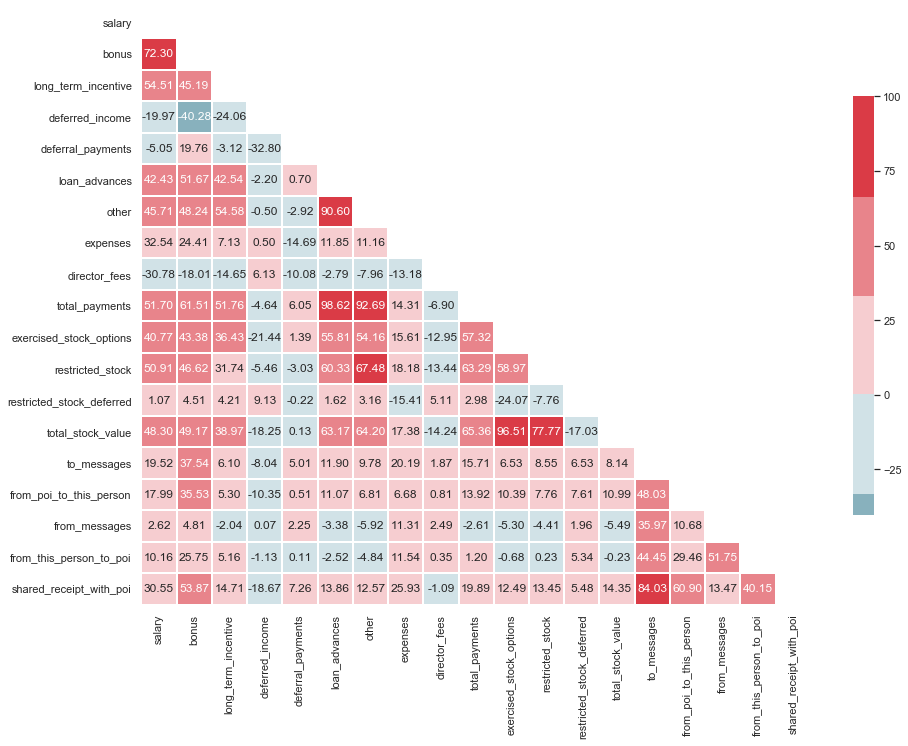

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

corr = df.corr() * 100

# Select upper triangle of correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=1, cbar_kws={"shrink": .7}, annot=True, fmt=".2f")

In [395]:
df.drop(columns=['total_payments', 'total_stock_value'], inplace=True)

In [396]:
df['ratio_of_poi_mail'] = df['from_poi_to_this_person']/df['to_messages']
df['ratio_of_mail_to_poi'] = df['from_this_person_to_poi']/df['from_messages']

In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

The most important columns are salary,bonus,deferred_income,other,exercised_stock_options,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,ratio_of_poi_mail,ratio_of_mail_to_poi


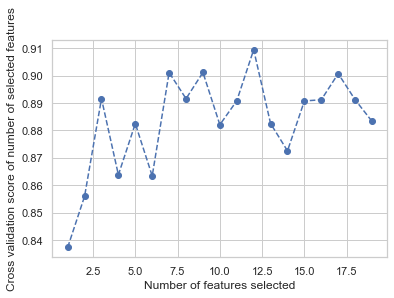

In [398]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=forest, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, '--o')
indices = rfecv.get_support()
columns = X_train.columns[indices]
print('The most important columns are {}'.format(','.join(columns)))

In [346]:
X_train = X_train[columns]
X_test = X_test[columns]

In [347]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

random_state = 42
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
log = LogisticRegression(random_state=random_state)
rfc = RandomForestClassifier(random_state=random_state)
mlp = MLPClassifier(random_state=random_state)
clf = DecisionTreeClassifier(random_state=random_state)

In [348]:
classifiers = [gnb, svc, knn, log, rfc, mlp,clf]
for clf in classifiers:
    clf.fit(X_train, y_train)

In [349]:
from sklearn.metrics import accuracy_score
def calculate_accuracy(X, y):
    result = pd.DataFrame(columns=['classifier', 'accuracy'])
    for abc in classifiers:
        predicted = abc.predict(X_test)
        accuracy = round(100.0 * accuracy_score(y_test, predicted), 2)
        classifier = abc.__class__.__name__
        classifier = classifier.replace('Classifier', '')
        result = result.append({'classifier': classifier, 'accuracy': accuracy}, ignore_index=True)
        print('Accuracy is {accuracy}% for {classifier_name}'.format(accuracy=accuracy, classifier_name=classifier))

    result = result.sort_values(['classifier'], ascending=True)
    plt.subplots(figsize=(10, 7))
    sns.barplot(x="classifier", y='accuracy', palette=cmap, data=result)

Accuracy is 92.86% for GaussianNB
Accuracy is 89.29% for SVC
Accuracy is 89.29% for KNeighbors
Accuracy is 96.43% for LogisticRegression
Accuracy is 92.86% for RandomForest
Accuracy is 96.43% for MLP
Accuracy is 89.29% for DecisionTree


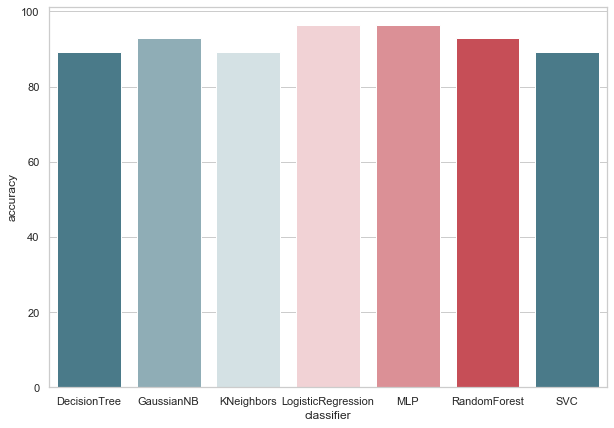

In [350]:
calculate_accuracy(X_train, y_train) 

In [351]:
from sklearn.metrics import confusion_matrix
def make_confussion_matrices(X, y):
    matrices = {}
    result = pd.DataFrame(columns=['classifier', 'recall'])
    for abc in classifiers:
        classifier = abc.__class__.__name__
        classifier = classifier.replace('Classifier', '')
        predicted = abc.predict(X_test)
        print(f'{predicted}-{classifier}')
        matrix = confusion_matrix(y_test,predicted,labels=[1,0])
        matrices[classifier] = matrix.T
    return matrices

In [352]:
matrices = make_confussion_matrices(X_train,y_train)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]-GaussianNB
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]-SVC
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]-KNeighbors
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-LogisticRegression
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-RandomForest
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-MLP
[0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-DecisionTree


In [353]:
import itertools
from collections import Iterable
def draw_confussion_matrices(row,col,matrices,figsize = (16,12)):
    fig, (axes) = plt.subplots(row,col, sharex='col', sharey='row',figsize=figsize )
    if any(isinstance(i, Iterable) for i in axes):
        axes =  list(itertools.chain.from_iterable(axes))

    idx = 0
    for name,matrix in matrices.items():
        df_cm = pd.DataFrame(
            matrix, index=['True','False'], columns=['True','False'], 
        )

        ax = axes[idx]
        fig.subplots_adjust(wspace=0.1)
        sns.heatmap(df_cm, annot=True,cmap=cmap,cbar=False ,fmt="d",ax=ax,linewidths=1) 
        ax.set_title(name)
        idx += 1

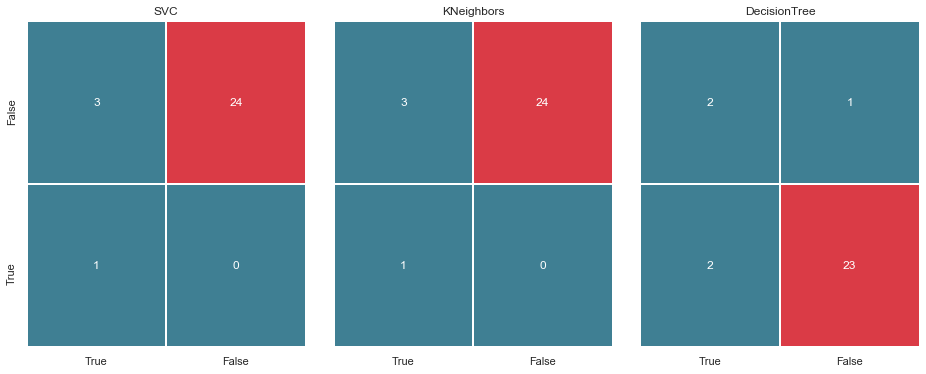

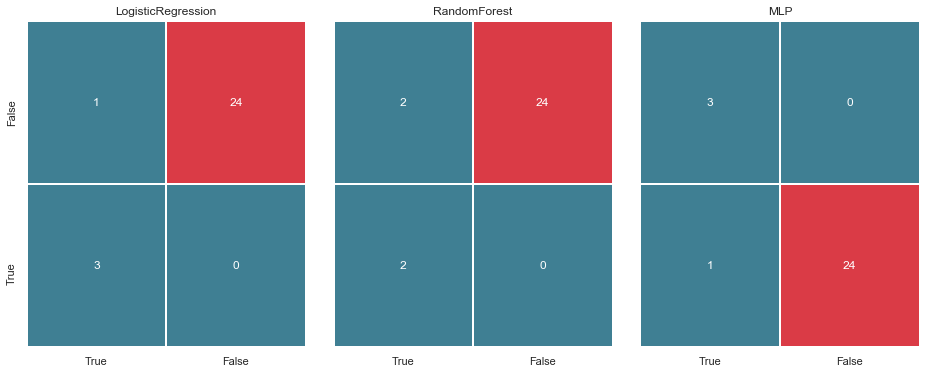

In [354]:
first_row = {"SVC":matrices['SVC'],"KNeighbors":matrices['KNeighbors'],"DecisionTree":matrices['DecisionTree']}
second_row = {"LogisticRegression":matrices['LogisticRegression'],"RandomForest":matrices['RandomForest'],"MLP":matrices['MLP']}

draw_confussion_matrices(1,3,first_row,figsize = (16,6))
draw_confussion_matrices(1,3,second_row,figsize = (16,6))

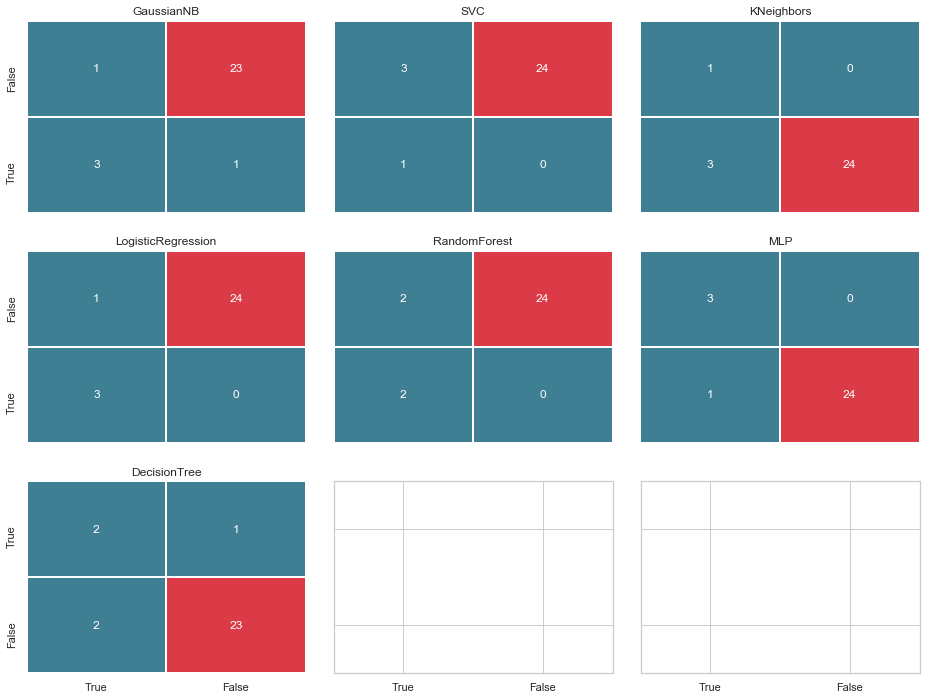

In [355]:
draw_confussion_matrices(3,3,matrices)

Precision is 0.85 for GaussianNB
Precision is 0.94 for SVC
Precision is 0.94 for KNeighbors
Precision is 0.98 for LogisticRegression
Precision is 0.96 for RandomForest
Precision is 0.98 for MLP
Precision is 0.79 for DecisionTree


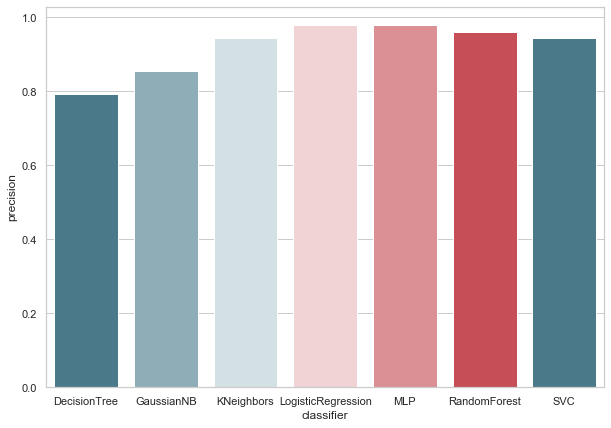

In [356]:
from sklearn.metrics import precision_score
def calculate_precision(X, y):
    result = pd.DataFrame(columns=['classifier', 'precision'])
    for clf in classifiers:

        predicted = clf.predict(X_test)
        precision = precision_score(y_test, predicted, average='macro')
        classifier = clf.__class__.__name__
        classifier = classifier.replace('Classifier', '')
        result = result.append({'classifier': classifier, 'precision': precision}, ignore_index=True)
        print('Precision is {precision} for {classifier_name}'.format(precision=round(precision,2), classifier_name=classifier))

    result = result.sort_values(['classifier'], ascending=True)
    plt.subplots(figsize=(10, 7))
    sns.barplot(x="classifier", y='precision', palette=cmap, data=result)
calculate_precision(X_train, y_train)

In [357]:
classifiers.remove(gnb)

In [358]:
parameters = {'SVC':{'kernel':('linear', 'rbf','poly'), 'C':[i for i in range(1,11)],'random_state': (random_state,)}, 
             'KNeighbors':{'algorithm':('ball_tree', 'kd_tree'), 'n_neighbors':[i for i in range(2,20)]},
             'LogisticRegression':{'penalty':('l1', 'l2'), 'C':[i for i in range(1,11)],'random_state': (random_state,)},
             'RandomForest':{'n_estimators':[i for i in range(10,101,10)],'random_state': (random_state,)},
             'MLP':{'activation':('relu','logistic'),'solver':('sgd','lbfgs'),'max_iter':(500,1000), 'hidden_layer_sizes':[(7,),(7,7)],'random_state': (random_state,)},
             'DecisionTree':{'max_depth': np.arange(3, 10),'presort': [True, False],'min_samples_split': np.arange(3, 10)}}

In [359]:
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
for idx,clf in enumerate(classifiers):
    classifier = clf.__class__.__name__
    classifier = classifier.replace('Classifier', '')
    params = parameters.get(classifier)
    if not params:
        continue

    new_clf = clf.__class__()
    gs = GridSearchCV(new_clf, params, cv=5)
    result =gs.fit(X_train, y_train)
    print(f'The best params for {classifier} are {result.best_params_}')
    classifiers[idx] = result.best_estimator_

The best params for SVC are {'C': 1, 'kernel': 'linear', 'random_state': 42}
The best params for KNeighbors are {'algorithm': 'ball_tree', 'n_neighbors': 2}
The best params for LogisticRegression are {'C': 1, 'penalty': 'l1', 'random_state': 42}
The best params for RandomForest are {'n_estimators': 90, 'random_state': 42}
The best params for MLP are {'activation': 'relu', 'hidden_layer_sizes': (7, 7), 'max_iter': 500, 'random_state': 42, 'solver': 'sgd'}
The best params for DecisionTree are {'max_depth': 3, 'min_samples_split': 5, 'presort': False}


In [360]:
matrices = make_confussion_matrices(X_train,y_train)

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-SVC
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]-KNeighbors
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-LogisticRegression
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-RandomForest
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]-MLP
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-DecisionTree


In [361]:
first_row = {"SVC":matrices['SVC'],"KNeighbors":matrices['KNeighbors'],"DecisionTree":matrices['DecisionTree']}
second_row = {"LogisticRegression":matrices['LogisticRegression'],"RandomForest":matrices['RandomForest'],"MLP":matrices['MLP']}

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-SVC
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]-KNeighbors
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-LogisticRegression
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-RandomForest
[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]-MLP
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]-DecisionTree


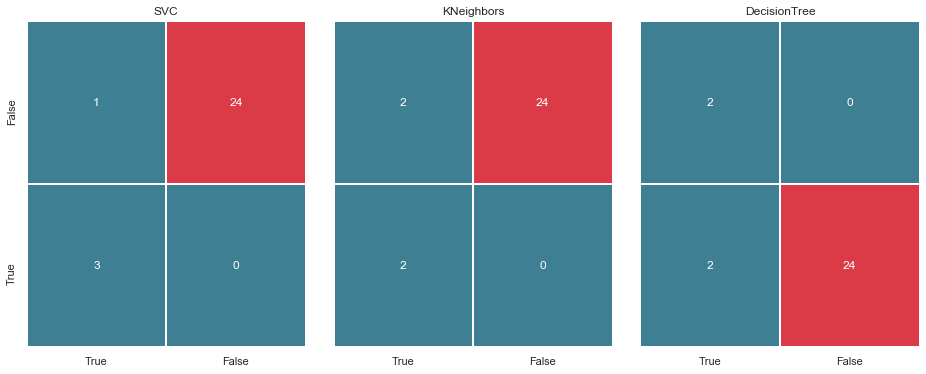

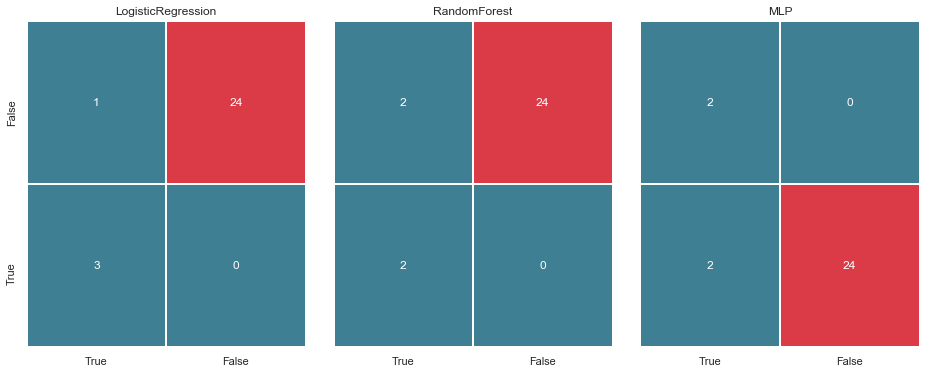

In [362]:
matrices = make_confussion_matrices(X_train,y_train)
draw_confussion_matrices(1,3,first_row,figsize = (16,6))
draw_confussion_matrices(1,3,second_row,figsize = (16,6))


Precision is 0.98 for SVC
Precision is 0.96 for KNeighbors
Precision is 0.98 for LogisticRegression
Precision is 0.96 for RandomForest
Precision is 0.96 for MLP
Precision is 0.96 for DecisionTree


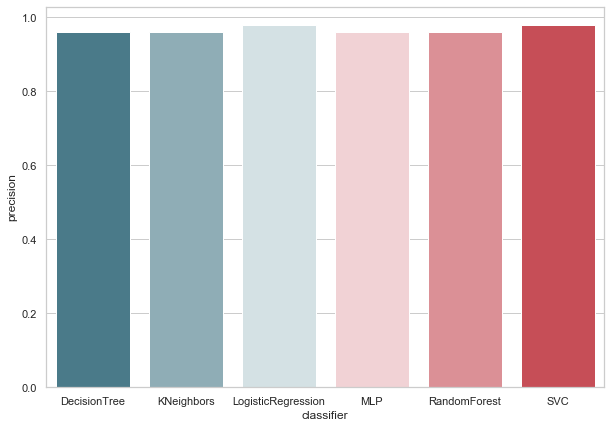

In [363]:
calculate_precision(X_train, y_train) 

In [399]:
df

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,exercised_stock_options,restricted_stock,restricted_stock_deferred,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,ratio_of_poi_mail,ratio_of_mail_to_poi
METTS MARK,1.074985,0.016378,-0.448493,0.298324,-0.308666,-0.085545,-0.241818,1.273063,-0.326663,-0.415638,-0.118526,0.18894,-0.638885,-0.363532,-0.400212,-0.523053,-0.451651,0.569009,1.306941
ELLIOTT STEVEN,0.000505,-0.220136,-0.448493,-0.446656,-0.308666,-0.085545,-0.230025,0.933079,-0.326663,0.577179,0.493221,0.18894,0.067310,0.039044,0.082179,0.017614,-0.017404,0.580052,0.214340
CORDES WILLIAM R,-0.942146,-0.551255,-0.448493,0.298324,-0.308666,-0.085545,-0.243647,-0.762888,-0.326663,-0.283302,-0.219555,0.18894,-0.664188,-0.913390,-0.413030,-0.538379,-1.236038,1.375198,1.303487
HANNON KEVIN P,0.399488,0.867828,1.998726,-5.496395,-0.308666,-0.085545,-0.231718,-0.027973,-0.326663,0.708664,0.017720,0.18894,-0.498836,-0.481359,-0.397950,-0.216533,-0.046060,0.964963,0.544122
MORDAUNT KRISTINA M,0.530733,-0.243787,-0.448493,0.298324,-0.308666,-0.085545,-0.242164,-0.006836,-0.326663,-0.415638,-0.309958,0.18894,0.067310,0.039044,0.082179,0.017614,-0.017404,0.580052,0.214340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRAMM WENDY L,-0.942146,-0.551255,-0.448493,0.298324,-0.308666,-0.085545,-0.243647,-0.762888,3.546434,-0.415638,-0.415960,0.18894,0.067310,0.039044,0.082179,0.017614,-0.017404,0.580052,0.214340
CAUSEY RICHARD A,1.347406,0.394800,0.081204,-0.138556,-0.308666,-0.085545,0.079951,-0.100625,-0.326663,-0.415638,0.856037,0.18894,-0.000426,0.029225,-0.385132,-0.354467,0.623835,-68.641289,0.920379
TAYLOR MITCHELL S,0.520371,0.016378,-0.448493,0.298324,0.130849,-0.085545,-0.243647,-0.762888,-0.326663,0.230206,-0.129336,0.18894,-0.800118,-1.109769,-0.400212,-0.538379,-0.941284,1.387006,1.345236
DONAHUE JR JEFFREY M,0.594194,0.205589,-0.448493,-0.259395,-0.308666,-0.085545,-0.242710,1.315575,-0.326663,-0.260144,-0.255786,0.18894,-0.604756,2.582141,-0.405490,-0.369793,-0.366392,-4.269725,0.911966


In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from csv import reader
from random import randrange

In [437]:
da = [1,3,6,9,16,17,18]
data = []
temp = []
for i in range(139):
    for j in da:
        temp.append(df.iloc[i,j])
    data+=[temp]
    temp = [] 

In [438]:
data

[[0.01637820186613618,
  0.29832395613147594,
  -0.2418179840402569,
  -0.4156379147077912,
  -0.45165147423018,
  0.5690093080107115,
  1.3069409361715694],
 [-0.2201356813669142,
  -0.4466564243840616,
  -0.23002470480646697,
  0.5771792752878243,
  -0.01740360195160508,
  0.580051511956313,
  0.2143397122879145],
 [-0.5512551178931847,
  0.29832395613147594,
  -0.243646725317041,
  -0.28330205340669623,
  -1.236038125644787,
  1.3751981189746811,
  1.3034867485169568],
 [0.8678281815051175,
  -5.496395270206314,
  -0.23171786698859295,
  0.7086638912618725,
  -0.04606023988070159,
  0.9649633689536419,
  0.5441215140489574],
 [-0.2437870696902192,
  0.29832395613147594,
  -0.24216376328167183,
  -0.4156379147077912,
  -0.01740360195160508,
  0.580051511956313,
  0.2143397122879145],
 [-0.5512551178931847,
  0.29832395613147594,
  -0.243646725317041,
  -0.31545184144305843,
  -1.2798858266555413,
  1.1356159194443136,
  1.3427059691952823],
 [1.9084892677305392,
  0.29832395613147594

In [439]:
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

In [440]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [441]:
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [442]:
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

In [443]:
def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        gini += (1.0 - score) * (size / n_instances)
    return gini

In [444]:
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            #print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [445]:
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

In [446]:
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

In [447]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [448]:
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [449]:
def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    predictions = list()
    for row in test:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return(predictions)

In [451]:

n_folds = 7

max_depth = 4


min_size = 10

scores = evaluate_algorithm(data, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [42.10526315789473, 47.368421052631575, 42.10526315789473, 52.63157894736842, 36.84210526315789, 26.31578947368421, 47.368421052631575]
Mean Accuracy: 42.105%
